#Imports


In [50]:
!pip install pmdarima

In [51]:
!pip install pandas-profiling

In [52]:
!pip install dtale

In [53]:
pip install cmake

In [54]:
pip install pystan

In [55]:
pip install wheel setuptools

In [56]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [57]:
from prophet import  Prophet

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport


import warnings
warnings.filterwarnings('ignore')



#Loading data

In [59]:
df = pd.read_excel('/content/Women Apparel.xlsx')

In [60]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Sports Direct,1197831,2021-03-16,South,Tennessee,Knoxville,Women's Apparel,24,169,4056,2028.00,0.50,Online
1,Sports Direct,1197831,2021-03-17,South,Tennessee,Knoxville,Women's Apparel,33,181,5973,2867.04,0.48,Online
2,Sports Direct,1197831,2021-03-18,South,Tennessee,Knoxville,Women's Apparel,32,122,3904,1873.92,0.48,Online
3,Sports Direct,1197831,2021-03-19,South,Tennessee,Knoxville,Women's Apparel,33,108,3564,2138.40,0.60,Online
4,Sports Direct,1197831,2021-03-20,South,Tennessee,Knoxville,Women's Apparel,37,83,3071,1259.11,0.41,Online


#Business Goal

To build a model that can predict sales of Adidas product provided the range of dates

#Data Preprocessing

Removing delimiters

In [61]:
# df = df.replace(',', '', regex = True)
# df['Price per Unit'] = str(df['Price per Unit'])
# df['Operating Profit'] = str(df['Operating Profit'])
# df['Units Sold'] = str(df['Units Sold'])
# df['Total Sales'] = str(df['Total Sales'])
# df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
# df['Operating Profit'] = df['Operating Profit'].str.replace('$', '')
# df['Units Sold'] = df['Units Sold'].str.replace('$', '')
# df['Total Sales'] = df['Total Sales'].str.replace('$', '')



Handling categorical values

In [62]:
columns_to_encode = ['Region', 'State', 'City', 'Product', 'Sales Method']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)
print(list(encoded_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Michigan', 'State_Missouri', 'State_Nebraska', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_Ohio', 'State_Oregon', 'State_South Carolina', 'State_Tennessee', 'State_Utah', 'State_Virginia', 'State_Wyoming', 'City_Albany', 'City_Albuquerque', 'City_Anchorage', 'City_Atlanta', 'City_Birmingham', 'City_Boise', 'City_Charleston', 'City_Charlotte', 'City_Cheyenne', 'City_Columbus', 'City_Detroit', 'City_Honolulu', 'City_Knoxville', 'City_Louisville', 'City_New Orleans', 'City_Omaha', 'City_Orlando', 'City_Phoenix', 'City_Portland', 'City_Richmond', 'City_Salt Lake City', 'City_St.

In [63]:
print(list(encoded_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Michigan', 'State_Missouri', 'State_Nebraska', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_Ohio', 'State_Oregon', 'State_South Carolina', 'State_Tennessee', 'State_Utah', 'State_Virginia', 'State_Wyoming', 'City_Albany', 'City_Albuquerque', 'City_Anchorage', 'City_Atlanta', 'City_Birmingham', 'City_Boise', 'City_Charleston', 'City_Charlotte', 'City_Cheyenne', 'City_Columbus', 'City_Detroit', 'City_Honolulu', 'City_Knoxville', 'City_Louisville', 'City_New Orleans', 'City_Omaha', 'City_Orlando', 'City_Phoenix', 'City_Portland', 'City_Richmond', 'City_Salt Lake City', 'City_St.

Converting dataframe to time stamped dataframe

In [64]:
encoded_df.set_index('Invoice Date', inplace = True)

In [65]:
encoded_df.index = pd.to_datetime(encoded_df.index)

In [66]:
encoded_df.sort_index(inplace = True)

In [67]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_New Orleans,City_Omaha,City_Orlando,City_Phoenix,City_Portland,City_Richmond,City_Salt Lake City,City_St. Louis,Product_Women's Apparel,Sales Method_Online
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,West Gear,1197831,34,143,4862,2917.20,0.60,0,0,1,...,1,0,0,0,0,0,0,0,1,1
2021-01-05,Foot Locker,1197831,36,85,3060,1132.20,0.37,0,0,1,...,1,0,0,0,0,0,0,0,1,1
2021-01-05,Foot Locker,1197831,33,133,4389,2326.17,0.53,0,0,1,...,1,0,0,0,0,0,0,0,1,1
2021-01-05,Foot Locker,1197831,28,119,3332,1332.80,0.40,0,0,1,...,1,0,0,0,0,0,0,0,1,1
2021-01-05,Foot Locker,1197831,28,196,5488,2469.60,0.45,0,0,1,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Amazon,1185732,53,122,6466,3103.68,0.48,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2021-12-28,Amazon,1185732,46,70,3220,1513.40,0.47,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2021-12-29,Amazon,1185732,41,38,1558,856.90,0.55,0,1,0,...,0,0,0,0,1,0,0,0,1,1


#Exploratory Data Analysis

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          1608 non-null   object        
 1   Retailer ID       1608 non-null   int64         
 2   Invoice Date      1608 non-null   datetime64[ns]
 3   Region            1608 non-null   object        
 4   State             1608 non-null   object        
 5   City              1608 non-null   object        
 6   Product           1608 non-null   object        
 7   Price per Unit    1608 non-null   int64         
 8   Units Sold        1608 non-null   int64         
 9   Total Sales       1608 non-null   int64         
 10  Operating Profit  1608 non-null   float64       
 11  Operating Margin  1608 non-null   float64       
 12  Sales Method      1608 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 163.4+ KB


In [69]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1608 entries, 2021-01-05 to 2021-12-31
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Retailer                 1608 non-null   object 
 1   Retailer ID              1608 non-null   int64  
 2   Price per Unit           1608 non-null   int64  
 3   Units Sold               1608 non-null   int64  
 4   Total Sales              1608 non-null   int64  
 5   Operating Profit         1608 non-null   float64
 6   Operating Margin         1608 non-null   float64
 7   Region_Midwest           1608 non-null   uint8  
 8   Region_Northeast         1608 non-null   uint8  
 9   Region_South             1608 non-null   uint8  
 10  Region_Southeast         1608 non-null   uint8  
 11  Region_West              1608 non-null   uint8  
 12  State_Alabama            1608 non-null   uint8  
 13  State_Alaska             1608 non-null   uint8  
 14  State_

In [70]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,1.608000e+03,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,1.166596e+06,46.718284,133.200871,6398.218284,3193.028526,0.494596
std,2.903857e+04,15.113044,56.168673,3842.116708,2089.211481,0.083291
min,1.128299e+06,9.000000,0.000000,0.000000,0.000000,0.260000
25%,1.128299e+06,37.000000,91.000000,3579.750000,1709.380000,0.450000
50%,1.185732e+06,46.000000,131.000000,5647.500000,2720.800000,0.490000
75%,1.185732e+06,55.000000,169.000000,8372.000000,4055.265000,0.540000
max,1.197831e+06,103.000000,326.000000,23220.000000,12574.240000,0.800000


In [71]:
encoded_df.dtypes

Retailer                    object
Retailer ID                  int64
Price per Unit               int64
Units Sold                   int64
Total Sales                  int64
Operating Profit           float64
Operating Margin           float64
Region_Midwest               uint8
Region_Northeast             uint8
Region_South                 uint8
Region_Southeast             uint8
Region_West                  uint8
State_Alabama                uint8
State_Alaska                 uint8
State_Arizona                uint8
State_Florida                uint8
State_Georgia                uint8
State_Hawaii                 uint8
State_Idaho                  uint8
State_Kentucky               uint8
State_Louisiana              uint8
State_Maine                  uint8
State_Michigan               uint8
State_Missouri               uint8
State_Nebraska               uint8
State_New Mexico             uint8
State_New York               uint8
State_North Carolina         uint8
State_Ohio          

Missing Values

In [72]:
encoded_df.isnull().sum()

Retailer                   0
Retailer ID                0
Price per Unit             0
Units Sold                 0
Total Sales                0
Operating Profit           0
Operating Margin           0
Region_Midwest             0
Region_Northeast           0
Region_South               0
Region_Southeast           0
Region_West                0
State_Alabama              0
State_Alaska               0
State_Arizona              0
State_Florida              0
State_Georgia              0
State_Hawaii               0
State_Idaho                0
State_Kentucky             0
State_Louisiana            0
State_Maine                0
State_Michigan             0
State_Missouri             0
State_Nebraska             0
State_New Mexico           0
State_New York             0
State_North Carolina       0
State_Ohio                 0
State_Oregon               0
State_South Carolina       0
State_Tennessee            0
State_Utah                 0
State_Virginia             0
State_Wyoming 

In [79]:
corr=df.corr()
corr

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.455232,0.152001,-0.150141,-0.020493,0.362555
Price per Unit,-0.455232,1.000000,0.206639,0.713673,0.605365,-0.186661
Units Sold,0.152001,0.206639,1.000000,0.803171,0.812952,0.252376
Total Sales,-0.150141,0.713673,0.803171,1.000000,0.946128,0.089104
Operating Profit,-0.020493,0.605365,0.812952,0.946128,1.000000,0.369073
Operating Margin,0.362555,-0.186661,0.252376,0.089104,0.369073,1.000000


In [80]:
df['Units Sold'] = df['Units Sold'].astype(int)
df['Total Sales'] = df['Total Sales'].astype(int)
df['Operating Profit'] = df['Operating Profit'].astype(int)

<Axes: >

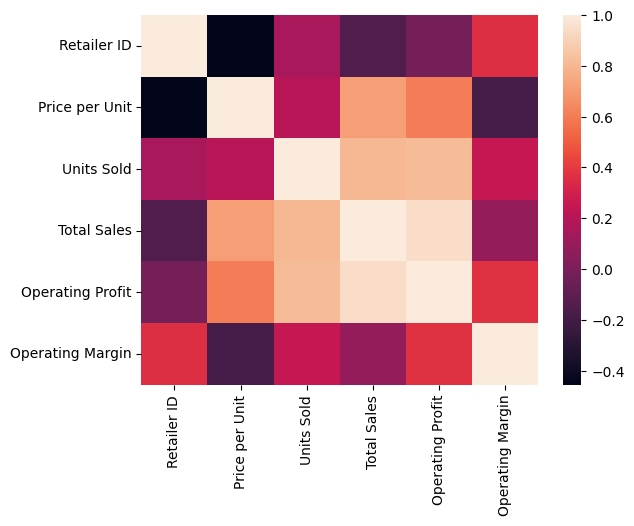

In [81]:
sns.heatmap(df.corr())

Granger causality test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag = 1
test   = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



In [ ]:
new = encoded_df[['Total Sales','Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'Sales Method_In-store', 'Sales Method_Outlet']].copy()

grangers_causation_matrix(new, variables = new.columns)

#Automated EDA

In [82]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_New Orleans,City_Omaha,City_Orlando,City_Phoenix,City_Portland,City_Richmond,City_Salt Lake City,City_St. Louis,Product_Women's Apparel,Sales Method_Online
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,West Gear,1197831,34,143,4862,2917.20,0.60,0,0,1,...,1,0,0,0,0,0,0,0,1,1
2021-01-05,Foot Locker,1197831,36,85,3060,1132.20,0.37,0,0,1,...,1,0,0,0,0,0,0,0,1,1
2021-01-05,Foot Locker,1197831,33,133,4389,2326.17,0.53,0,0,1,...,1,0,0,0,0,0,0,0,1,1
2021-01-05,Foot Locker,1197831,28,119,3332,1332.80,0.40,0,0,1,...,1,0,0,0,0,0,0,0,1,1
2021-01-05,Foot Locker,1197831,28,196,5488,2469.60,0.45,0,0,1,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Amazon,1185732,53,122,6466,3103.68,0.48,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2021-12-28,Amazon,1185732,46,70,3220,1513.40,0.47,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2021-12-29,Amazon,1185732,41,38,1558,856.90,0.55,0,1,0,...,0,0,0,0,1,0,0,0,1,1


In [83]:
report = ProfileReport(df, title = "Pandas Profiling Report", explorative = True)
report.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
import dtale
import dtale.app as dtale_app
dtale.app.USE_COLAB = True

In [85]:
dtale.show(df)

https://crswn29rtxh-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

#Stationarity Check

In [86]:
encoded_df = encoded_df.resample(rule = 'W').mean()

In [87]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [88]:
adf_test(encoded_df['Total Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.918892
p-value                  0.001900
# lags used              0.000000
# observations          51.000000
critical value (1%)     -3.565624
critical value (5%)     -2.920142
critical value (10%)    -2.598015
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [89]:
# from statsmodels.tsa.statespace.tools import diff

In [90]:
# encoded_df['Total Sales(1)'] = diff(encoded_df['Total Sales'],k_diff=1)

In [91]:
# adf_test(encoded_df['Total Sales(1)'])

In [92]:
# encoded_df['Total Sales(1)']

#Seasonal Decomposition

In [93]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

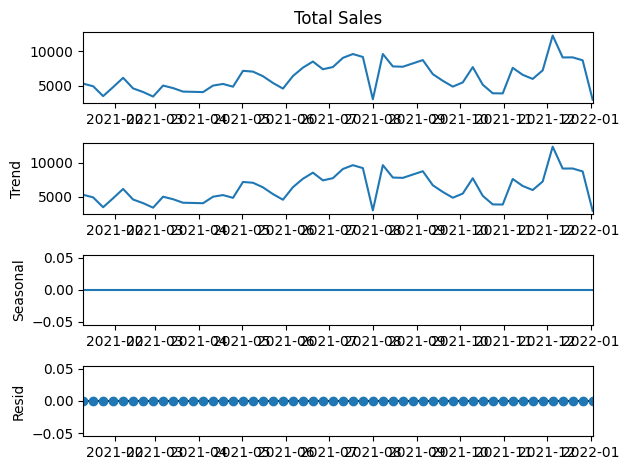

In [94]:
result = seasonal_decompose(encoded_df['Total Sales'], model = 'additive',period = 1)
result.plot();

#SMA

In [95]:
encoded_df['2-week-SMA'] = encoded_df['Total Sales'].rolling(window = 2).mean()
encoded_df['3-week-SMA'] = encoded_df['Total Sales'].rolling(window = 3).mean()

In [96]:
encoded_df['2-week-SMA']

Invoice Date
2021-01-10             NaN
2021-01-17     5087.125000
2021-01-24     4173.916988
2021-01-31     4109.536036
2021-02-07     5448.777778
2021-02-14     5353.875000
2021-02-21     4315.180556
2021-02-28     3719.013889
2021-03-07     4189.819444
2021-03-14     4809.222222
2021-03-21     4366.880952
2021-03-28     4093.101382
2021-04-04     4057.040943
2021-04-11     4514.031397
2021-04-18     5111.472146
2021-04-25     5029.364865
2021-05-02     5991.007112
2021-05-09     7095.962649
2021-05-16     6701.779861
2021-05-23     5871.364865
2021-05-30     4963.520488
2021-06-06     5471.578098
2021-06-13     7008.001074
2021-06-20     8069.939105
2021-06-27     7950.877880
2021-07-04     7548.186813
2021-07-11     8382.880691
2021-07-18     9334.684225
2021-07-25     9399.675676
2021-08-01     6085.613900
2021-08-08     6302.957143
2021-08-15     8711.030233
2021-08-22     7778.295097
2021-08-29     7997.445510
2021-09-05     8484.780645
2021-09-12     7700.118919
2021-09-19     

In [97]:
encoded_df['3-week-SMA']

Invoice Date
2021-01-10             NaN
2021-01-17             NaN
2021-01-24     4541.551802
2021-01-31     4372.166881
2021-02-07     4782.653654
2021-02-14     5158.805556
2021-02-21     4919.750000
2021-02-28     4005.629630
2021-03-07     4143.712963
2021-03-14     4334.990741
2021-03-21     4575.624339
2021-03-28     4270.512033
2021-04-04     4074.170152
2021-04-11     4368.612329
2021-04-18     4753.083995
2021-04-25     5016.828277
2021-05-02     5737.734471
2021-05-09     6339.821946
2021-05-16     6852.677802
2021-05-23     6260.060448
2021-05-30     5431.049695
2021-06-06     5439.925940
2021-06-13     6188.807168
2021-06-20     7510.871684
2021-06-27     7841.673689
2021-07-04     7870.995510
2021-07-11     8050.301413
2021-07-18     8793.533073
2021-07-25     9284.627321
2021-08-01     7262.021879
2021-08-08     7263.475933
2021-08-15     6802.924917
2021-08-22     8391.930065
2021-08-29     7932.583828
2021-09-05     8241.097007
2021-09-12     7880.466376
2021-09-19     

<Axes: xlabel='Invoice Date'>

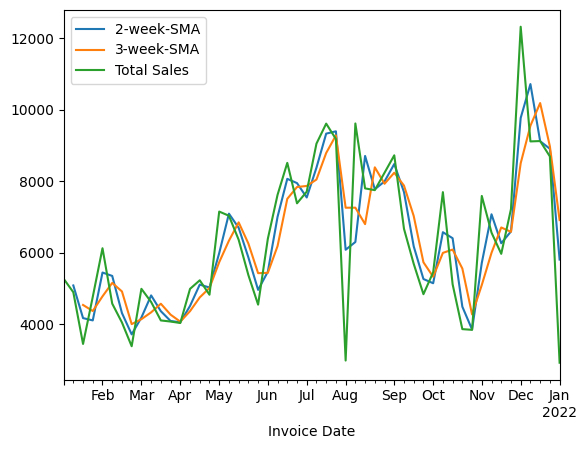

In [98]:
encoded_df['2-week-SMA'].plot(legend = True)
encoded_df['3-week-SMA'].plot(legend = True)
encoded_df['Total Sales'].plot(legend = True)

In [99]:
encoded_df['6-week-SMA'] = encoded_df['Total Sales'].rolling(window = 6).mean()
encoded_df['12-week-SMA'] = encoded_df['Total Sales'].rolling(window = 12).mean()

<Axes: xlabel='Invoice Date'>

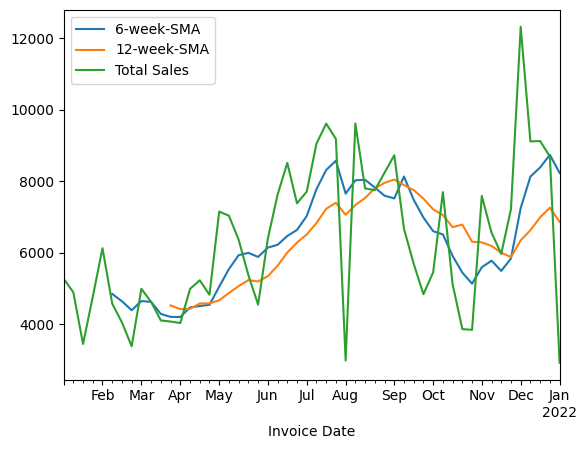

In [100]:
encoded_df['6-week-SMA'].plot(legend = True)
encoded_df['12-week-SMA'].plot(legend = True)
encoded_df['Total Sales'].plot(legend = True)

#EWMA

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.


The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

In [101]:
encoded_df['EWMA'] = encoded_df['Total Sales'].ewm(span = 1).mean()

In [102]:
encoded_df['EWMA']

Invoice Date
2021-01-10     5276.821429
2021-01-17     4897.428571
2021-01-24     3450.405405
2021-01-31     4768.666667
2021-02-07     6128.888889
2021-02-14     4578.861111
2021-02-21     4051.500000
2021-02-28     3386.527778
2021-03-07     4993.111111
2021-03-14     4625.333333
2021-03-21     4108.428571
2021-03-28     4077.774194
2021-04-04     4036.307692
2021-04-11     4991.755102
2021-04-18     5231.189189
2021-04-25     4827.540541
2021-05-02     7154.473684
2021-05-09     7037.451613
2021-05-16     6366.108108
2021-05-23     5376.621622
2021-05-30     4550.419355
2021-06-06     6392.736842
2021-06-13     7623.265306
2021-06-20     8516.612903
2021-06-27     7385.142857
2021-07-04     7711.230769
2021-07-11     9054.530612
2021-07-18     9614.837838
2021-07-25     9184.513514
2021-08-01     2986.714286
2021-08-08     9619.200000
2021-08-15     7802.860465
2021-08-22     7753.729730
2021-08-29     8241.161290
2021-09-05     8728.400000
2021-09-12     6671.837838
2021-09-19     

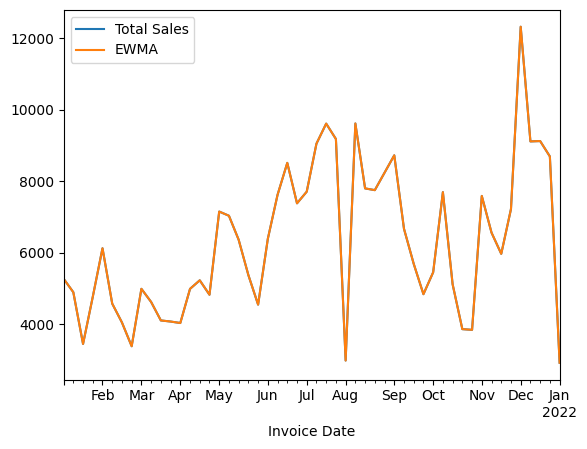

In [103]:
encoded_df['Total Sales'].plot(legend = True)
encoded_df['EWMA'].plot(legend = True);


#Evaluation Metrics

SMA

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [105]:
mean_absolute_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:])

995.6182354984207

In [106]:
mean_squared_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:])

1848916.928315745

In [107]:
np.sqrt(mean_squared_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:]))

1359.7488475140344

In [108]:
mean_absolute_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:])

700.9856059574898

In [109]:
mean_squared_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:])

1090846.5181264612

In [110]:
np.sqrt(mean_squared_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:]))

1044.4359808654915

EWMA Evaluation

In [111]:
len(encoded_df)

52

In [112]:
test_data = encoded_df.iloc[:40]
train_data = encoded_df.iloc[40:]

In [113]:
mean_absolute_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-10-17': '2021-11-21'])

1039.2465637975604

In [49]:
mean_squared_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-10-17': '2021-11-21'])

NameError: ignored

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-10-17': '2021-11-21']))

In [ ]:
encoded_df['Total Sales'].mean()

#Holt Winters Method

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
span = 2
alpha = 2 / (span + 1)

In [ ]:
encoded_df['EWMA'] = encoded_df['Total Sales'].ewm(alpha = alpha, adjust = False).mean()

In [ ]:
encoded_df['EWMA']

In [ ]:
model = SimpleExpSmoothing(encoded_df['Total Sales'])

In [ ]:
encoded_df['Total Sales']

In [ ]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
encoded_df['SES7'] = fitted_model.fittedvalues.shift(-1)

In [ ]:
encoded_df['SES7']

Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
encoded_df['DES7'] = ExponentialSmoothing(encoded_df['Total Sales'], trend = 'add').fit().fittedvalues.shift(-1)

In [ ]:
encoded_df[['Total Sales','EWMA', 'SES7', 'DES7']].plot()


In [ ]:
train_data = encoded_df.iloc[:40]
test_data = encoded_df.iloc[40:]

In [ ]:
test_predictions = fitted_model.forecast(6)

In [ ]:
test_predictions

Triple Exponential Smoothing

In [ ]:
encoded_df['TES7'] = ExponentialSmoothing(encoded_df['Total Sales'], trend = 'add', seasonal_periods = 1).fit().fittedvalues.shift(-1)

In [ ]:
encoded_df[['Total Sales','EWMA', 'SES7', 'DES7', 'TES7']].plot()

#Evaluation Metrics

Triple Exponential Smoothing

In [ ]:
fitted_model  =  ExponentialSmoothing(train_data['Total Sales'], trend = 'add', seasonal_periods = 1).fit()

In [ ]:
test_predictions = fitted_model.forecast(6)

In [ ]:
test_predictions

In [ ]:
 train_data['Total Sales']


In [ ]:
test_predictions

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
test_data['Total Sales'][:6]

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],test_predictions)

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],test_predictions))

SES Evaluation

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],encoded_df['SES7']['2021-10-17': '2021-11-21'])

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],encoded_df['SES7']['2021-10-17': '2021-11-21'])

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],encoded_df['SES7']['2021-10-17': '2021-11-21']))

In [ ]:
encoded_df['Total Sales'].mean()

DES Evaluation


In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],encoded_df['DES7']['2021-10-17': '2021-11-21'])

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],encoded_df['DES7']['2021-10-17': '2021-11-21'])

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],encoded_df['DES7']['2021-10-17': '2021-11-21']))

In [ ]:
encoded_df['Total Sales'].mean()

In [ ]:
result.plot();

In [ ]:
len(encoded_df)

In [ ]:
encoded_df['Total Sales'].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
# from statsmodels.tsa.statespace.tools import diff

In [ ]:
# encoded_df['Total Sales(1)'] = diff(encoded_df['Total Sales'],k_diff=1)

In [ ]:
# adf_test(encoded_df['Total Sales(1)'])

In [ ]:
# encoded_df['Total Sales(1)']

#AR,ARIMA

AR(1)

In [ ]:
len(encoded_df)

In [ ]:
train_data = encoded_df.iloc[:40]
test_data = encoded_df.iloc[40:]

In [ ]:
model = AutoReg(train_data['Total Sales'], lags=1)
AR1fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [ ]:
predictions1

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(5,3));

AR(2) Model

In [ ]:
model = AutoReg(train_data['Total Sales'], lags=2)
AR2fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(5,2));

AR(p) model where statsmodels chooses p

In [ ]:
for i in range(1,10):
  model = AutoReg(train_data['Total Sales'], lags=i)
  ARfit = model.fit()
  predictions = ARfit.predict(start=start, end=end, dynamic=False)
  error = np.sqrt(mean_squared_error(test_data['Total Sales'], predictions))
  print(f'Lag {i} Error : {error}')
  min_error = float('inf')
  min_error = min(min_error, error)

print(min_error)



In [ ]:
model = AutoReg(train_data['Total Sales'], lags=4)
AR4fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions4 = AR4fit.predict(start=start, end=end, dynamic=False).rename('AR(4)')

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True);
predictions4.plot(legend=True);

Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(4)']
preds = [predictions1, predictions2, predictions4]

for i in range(3):
    error = np.sqrt(mean_squared_error(test_data['Total Sales'], preds[i]))
    print(f'{labels[i]} Error: {error}')

Forecast

In [ ]:
model = AutoReg(encoded_df['Total Sales'], lags = 4)
ARfit = model.fit()
fcast = ARfit.predict(start=len(encoded_df), end=len(encoded_df)+ 10, dynamic=False).rename('Forecast')
encoded_df['Total Sales'].plot(legend=True)
fcast.plot(legend=True,figsize=(10,5));

In [ ]:
fcast

ARIMA

In [ ]:
auto_arima(encoded_df['Total Sales'], seasonal = False).summary()

In [ ]:
model2 = ARIMA(encoded_df['Total Sales'], order = (0,1,1))

In [ ]:
results = model2.fit()

In [ ]:
len(encoded_df)

In [ ]:
train_data = encoded_df[:40]
test_data = encoded_df[40:]

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start,end).rename('ARIMA Model')

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)
error

In [ ]:
test_data['Total Sales'].mean()

In [ ]:
fcast = results.predict(len(encoded_df),len(encoded_df)+10).rename(' ARIMA Forecast')

In [ ]:
fcast

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

#ARIMAX

In [ ]:
train_data = encoded_df[:40]
test_data = encoded_df[40:]

In [ ]:
model2 = ARIMA(endog = train_data['Total Sales'],exog = train_data.iloc[:, 7:57],  order = (0,1,1))

In [ ]:
results = model2.fit()

In [ ]:
len(encoded_df)

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start = start, end = end, exog = test_data.iloc[:, 7:57]).rename('ARIMAX Predictions')

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)
error

In [ ]:
test_data['Total Sales'].mean()

fcast

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)



#SARIMA

In [ ]:
result = seasonal_decompose(encoded_df['Total Sales'], model = 'add', period = 1)

In [ ]:
result.plot()

In [ ]:
model = SARIMAX(train_data['Total Sales'], order = (0, 1, 1), seasonal_order=(0,1,1,7))

In [ ]:
results = model.fit()

In [ ]:
results.summary()

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start, end).rename('SARIMA Predictions')

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)

In [ ]:
error

In [ ]:
test_data['Total Sales'].mean()

In [ ]:
test_data.shape

In [ ]:
test_data.iloc[:, 6:60]

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
fcast = results.predict(len(encoded_df),len(encoded_df)+10, exog = test_data.iloc[:, 6:60]).rename('Forecast')

#SARIMAX

In [ ]:
encoded_df.shape

In [ ]:
encoded_df.columns

In [ ]:
train = encoded_df[:40]
test = encoded_df[40:]

In [ ]:
encoded_df.columns

In [ ]:
selected_cols = ['3-week-SMA'	,'6-week-SMA',	'12-week-SMA',	'EWMA',	'SES7'	,'DES7',	'TES7', '2-week-SMA']

In [ ]:
train.drop(selected_cols, axis = 1, inplace = True)

In [ ]:
len(train.columns)

In [ ]:
train.columns

In [ ]:
model = SARIMAX(train['Total Sales'],exog=train.iloc[: ,7:57],order=(0,1,1),enforce_invertibility=False)
results = model.fit()
results.summary()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions = results.predict(start = start, end = end, exog = test.iloc[:, 7:57]).rename('SARIMAX Predictions')

In [ ]:
test_data.columns

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)

In [ ]:
test_data['Total Sales']


In [ ]:
predictions

In [ ]:
error

In [ ]:
test_data['Total Sales'].mean()

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)


# VAR, VARIMA



VAR

In [ ]:
transformed_df = encoded_df[['Price per Unit', 'Total Sales']]

In [ ]:
train_data = transformed_df.iloc[:40]
test_data = transformed_df.iloc[40:]

In [ ]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(transformed_df)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

## Fit the VAR(4) Model

In [ ]:
results = model.fit(4)
results.summary()

In [ ]:
lag_order = results.k_ar
lag_order

In [ ]:
z = results.forecast(y=train_data.values[-lag_order:], steps=10)
z

In [ ]:
test_data

In [ ]:
idx = pd.date_range('2021-10-17', periods=10, freq='W')
df_forecast = pd.DataFrame(z, index=idx, columns=['Price Per Unit','Total Sales'])
df_forecast

## Plot the results
The VARResults object offers a couple of quick plotting tools:

In [ ]:
results.plot();

In [ ]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

In [ ]:
transformed_df['Price per Unit']['2021-10-17':'2021-12-19'].plot(figsize=(12,5),legend=True)
df_forecast['Price Per Unit'].plot(legend=True);

In [ ]:
transformed_df['Total Sales']['2021-10-17':'2021-12-19'].plot(figsize=(12,5),legend=True)
df_forecast['Total Sales'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [ ]:
RMSE1 = rmse(transformed_df['Price per Unit']['2021-10-17':'2021-12-19'], df_forecast['Price Per Unit']['2021-10-17':'2021-12-19'])
RMSE1

In [ ]:
RMSE2 = rmse(transformed_df['Total Sales']['2021-10-17':'2021-12-19'], df_forecast['Total Sales']['2021-10-17':'2021-12-19'])
RMSE2

In [ ]:
transformed_df['Price per Unit'].mean()


In [ ]:
transformed_df['Total Sales'].mean()

#Facebook Prophet Forecasting

In [ ]:
original = pd.read_excel('/content/Women Apparel.xlsx')

In [ ]:
original

In [ ]:
columns_to_encode = ['Region', 'State', 'City', 'Product', 'Sales Method']
original_df = pd.get_dummies(original, columns=columns_to_encode)
print(list(original_df))

In [ ]:
original_df.index = pd.to_datetime(original_df.index)
original_df.set_index('Invoice Date', inplace = True)

In [ ]:
original_df = original_df.resample(rule = 'W').mean()

In [ ]:
original_df

In [ ]:
df = original_df['Total Sales'].copy()

In [ ]:
original_df.reset_index(drop=False, inplace=True)


In [ ]:
original_df

In [ ]:
selected_columns = ['Invoice Date', 'Total Sales']

In [ ]:
df = original_df[selected_columns].copy()

In [ ]:
df

In [ ]:
df.columns = ['ds', 'y']

In [ ]:
train = df.iloc[:40]
test = df.iloc[40:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=10,freq='W')
forecast = m.predict(future)

In [ ]:
future

In [ ]:
forecast.head()

In [ ]:
forecast.tail()

In [ ]:
forecast.columns

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

In [ ]:
import matplotlib.pyplot as plt
m.plot(forecast);

In [ ]:
forecast.plot(x='ds',y='yhat')

In [ ]:
m.plot_components(forecast);



In [ ]:
df.plot(x= 'ds', y = 'y')

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Units Sold',legend=True,ax=ax)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[40:50]['yhat']

In [ ]:
forecast


In [ ]:
predictions

In [ ]:
test['y']

In [ ]:
test['y'].iloc[-1]


In [ ]:
rmse(predictions,test['y'].iloc[-1])

In [ ]:
test['y'].mean()

#Multivariate Forecasting

In [ ]:
original_df

In [ ]:
original_df.columns

In [ ]:
new_column_names = {
    'Invoice Date': 'ds',
    'Total Sales': 'y'
}
original_df.rename(columns=new_column_names, inplace=True)

original_df['y_original'] = original_df['y'].copy()

In [ ]:
train = original_df[:20]
test = original_df[20:]

In [ ]:
train

In [ ]:
original_df.info()

In [ ]:
original_df.columns

In [ ]:
m1= Prophet()
m1.add_regressor('Sales Method_Online')
m1.add_regressor('Region_Midwest')
m1.add_regressor('Region_Northeast')
m1.add_regressor('Region_South')
m1.add_regressor('Region_Southeast')
m1.add_regressor('Region_West')
m1.fit(train)



In [ ]:
future = m1.make_future_dataframe(periods=7,freq='W')


In [ ]:
m1.component_modes

In [ ]:
future['Sales Method_Online'] = 1
future['Region_Northeast'] = 1
future['Region_Midwest'] = 0
future['Region_South'] = 0
future['Region_Southeast'] = 0
future['Region_West'] = 0

In [ ]:
future

In [ ]:
forecast

In [ ]:
forecast2 = m1.predict(future)

In [ ]:
test

In [ ]:
m1.plot(forecast2);